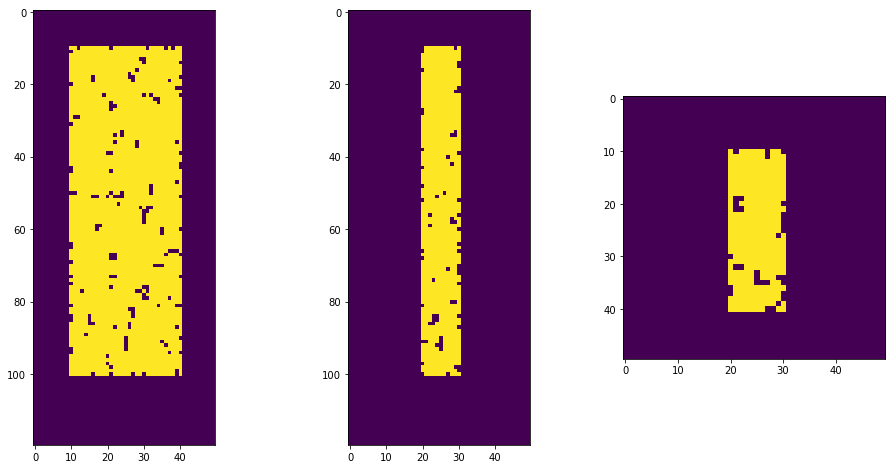

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage.morphology import binary_erosion
import ImageManipulation as immn
import importlib
importlib.reload(immn)

struc = np.zeros((120,50,50))
np.random.seed(seed = 10)
struc[10:101, 10:41, 20:31] = np.random.randint(0,12, size = (91,31,11))
struc = (struc > 1).astype(np.int)

label_im, nb_labels = ndimage.label(struc==0)
sizes = ndimage.sum((struc==0), label_im, range(nb_labels + 1))

mask_size = sizes < 6
remove_pixel = mask_size[label_im]
struc[remove_pixel] = 1

immn.showSlices(struc, 70, 25, 25)

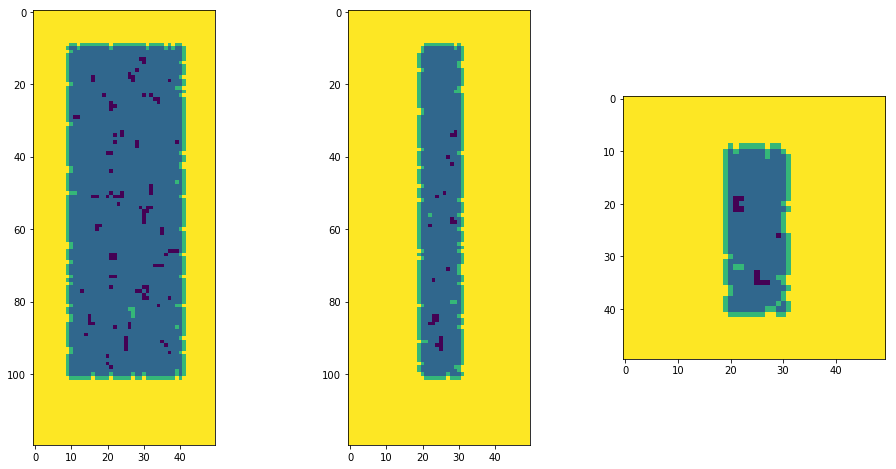

In [41]:
struc = immn.ComTomLabelPoreMatrixSurface(struc, minVal = 0, maxVal = 1)

immn.showSlices(struc, 70, 25, 25)

In [42]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

vertsMat, facesMat, normalsMat, valuesMat = measure.marching_cubes_lewiner(struc, level = 1)
vertsPor, facesPor, normalsPor, valuesPor = measure.marching_cubes_lewiner(struc, level = 0)

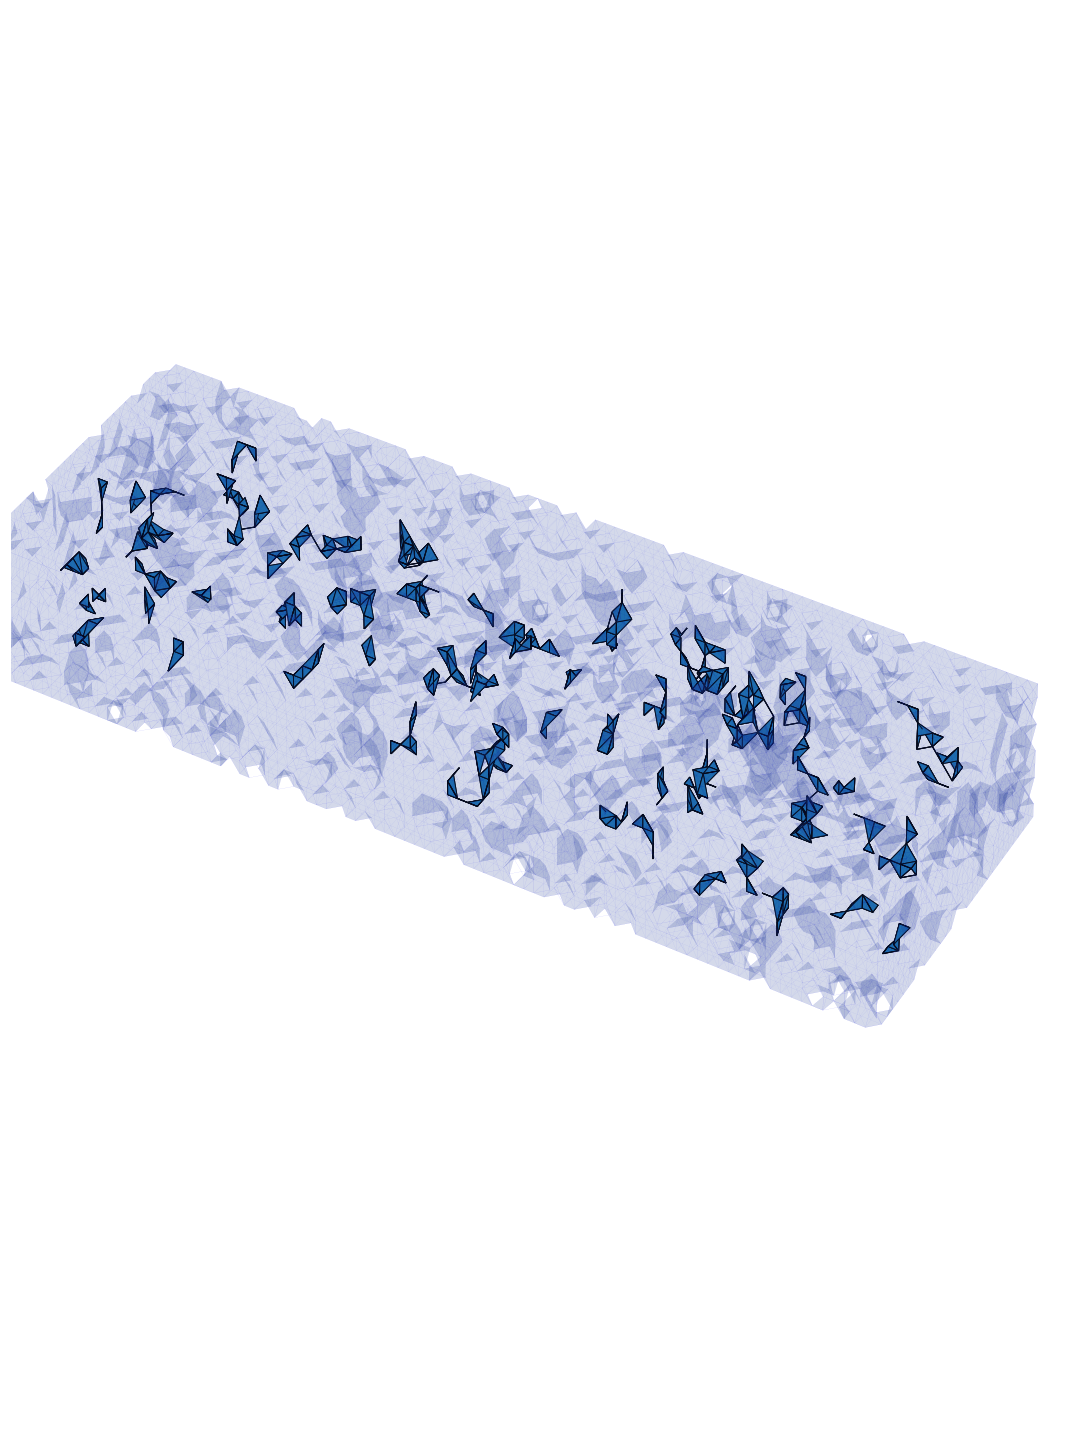

In [43]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(111, projection='3d')

meshMat = Poly3DCollection(vertsMat[facesMat], alpha = 0.1, linewidths = 0.1)
meshMat.set_edgecolor('b')
face_color = [0.15, 0.25, 0.6] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
meshMat.set_facecolor(face_color)
ax.add_collection3d(meshMat)

meshPor = Poly3DCollection(vertsPor[facesPor], alpha = 0.9)
meshPor.set_edgecolor('k')
ax.add_collection3d(meshPor)

ax.set_xlim(0, 200)
ax.set_ylim(0, 200) 
ax.set_zlim(0, 700)

# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the ticks
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Making bounding box
max_range = round(struc.shape[2] / 2.0)

mid_x = round(struc.shape[0] * 0.5)
mid_y = round(struc.shape[1] * 0.5)
mid_z = round(struc.shape[2] * 0.5)
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.tight_layout()
plt.show()

In [ ]:
np.save('Example_Struc', struc)